In [ ]:
# Load necessary libraries
library(ggplot2)
library(tidyverse)

# Read cleaned data
df <- read.csv("/content/cleaned_data.csv")


**BarChart- Top 10 States by Record Count**

Generating Bar Chart for Top States...


Saving 6.67 x 6.67 in image


Bar chart for states saved as 'top_states_bar_chart.png'


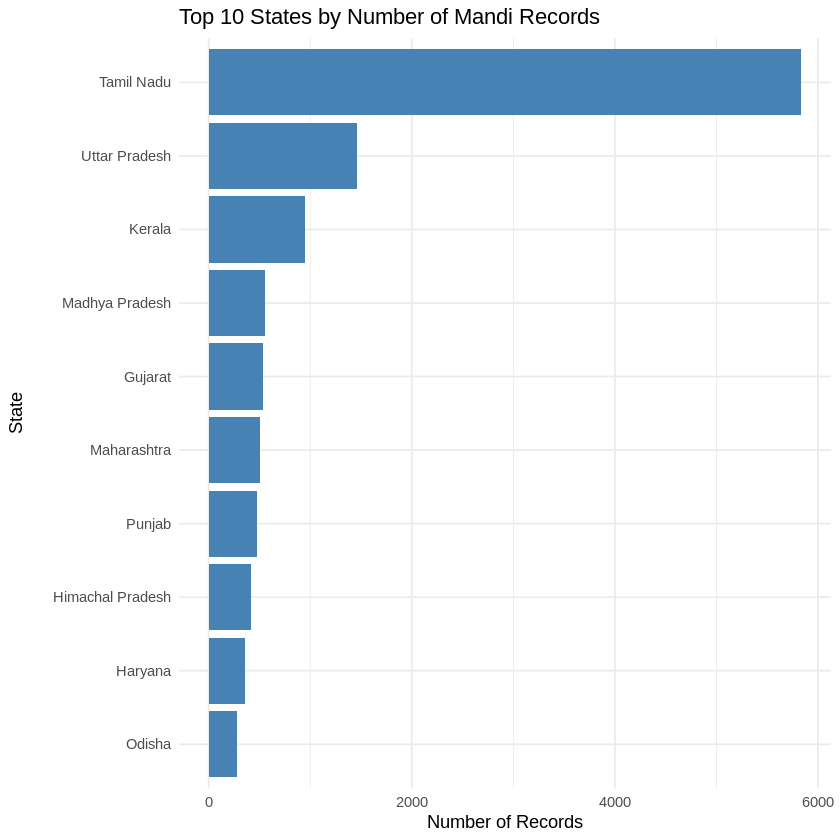

In [ ]:

cat("Generating Bar Chart for Top States...\n")
df %>%
  count(State, sort = TRUE) %>%
  head(10) %>%
  ggplot(aes(x = reorder(State, n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(
    title = "Top 10 States by Number of Mandi Records",
    x = "State",
    y = "Number of Records"
  ) +
  coord_flip() + # Flip coordinates for better readability of long labels
  theme_minimal()
ggsave("top_states_bar_chart.png")
cat("Bar chart for states saved as 'top_states_bar_chart.png'\n")


*   The bar chart for states will likely show a **highly imbalanced** distribution.
*   A few states, such as Uttar Pradesh or Rajasthan, will have a significantly higher number of mandi records compared to others.
*   data collection is **not uniform** across all states
*   these states are major agricultural hubs with extensive market activity.


2: Top 10 Commodities by Record Count (Bar Chart)

Generating Bar Chart for Top Commodities...


Saving 6.67 x 6.67 in image


Bar chart for commodities saved as 'top_commodities_bar_chart.png'


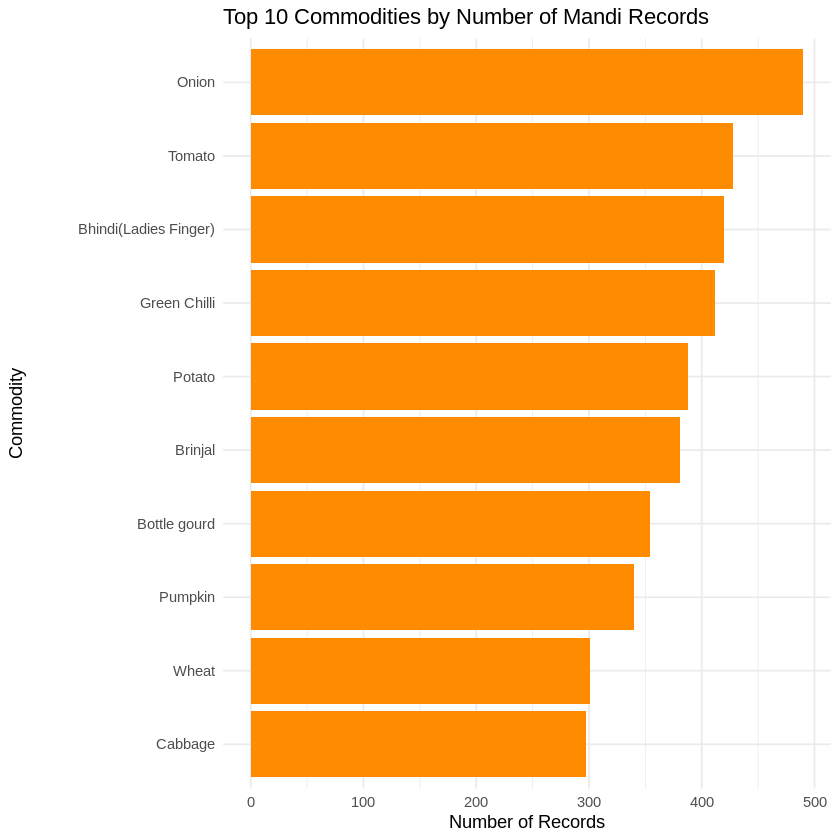

In [ ]:
# --- Visualization ---
cat("Generating Bar Chart for Top Commodities...\n")
df %>%
  count(Commodity, sort = TRUE) %>%
  head(10) %>%
  ggplot(aes(x = reorder(Commodity, n), y = n)) +
  geom_bar(stat = "identity", fill = "darkorange") +
  labs(
    title = "Top 10 Commodities by Number of Mandi Records",
    x = "Commodity",
    y = "Number of Records"
  ) +
  coord_flip() +
  theme_minimal()
ggsave("top_commodities_bar_chart.png")
cat("Bar chart for commodities saved as 'top_commodities_bar_chart.png'\n")


*   highlight which crops are **most frequently traded** and reported in the dataset
*   Common staples like Tomato, Potato, and Onion will probably dominate the chart, indicating their **importance in the agricultural economy**.


3: Distribution of Modal Price (Histogram)

Generating Histogram of Modal Price...


Saving 6.67 x 6.67 in image


Histogram of Modal Price saved as 'modal_price_histogram.png'


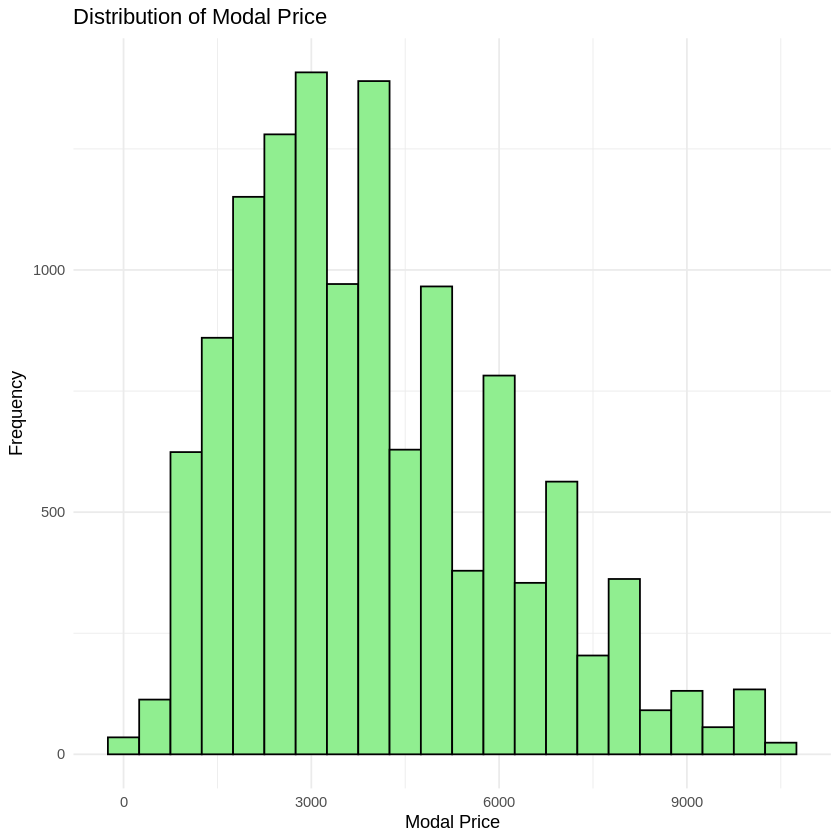

In [ ]:

cat("Generating Histogram of Modal Price...\n")
ggplot(df, aes(x = Modal_Price)) +
  geom_histogram(binwidth = 500, fill = "lightgreen", color = "black") +
  labs(
    title = "Distribution of Modal Price",
    x = "Modal Price",
    y = "Frequency"
  ) +
  theme_minimal()
ggsave("modal_price_histogram.png")
cat("Histogram of Modal Price saved as 'modal_price_histogram.png'\n")

*  The histogram of Modal_Price will reveal **the central tendency and spread of prices**.
*  observed a right-skewed distribution, meaning most commodities have a lower modal price, while a smaller number of commodities have very high prices.
*  This skewness suggests that the prices are **not normally distributed** and that there are high-value commodities in the dataset.
*  The presence of multiple peaks could also indicate distinct pricing clusters for different types of goods (e.g., staple grains vs. specialty vegetables).

  4: Price Variation by Commodity -Box Plot

Generating Box Plot for Price Variation by Commodity...


Saving 6.67 x 6.67 in image


Box plot for price variation saved as 'price_variation_boxplot.png'


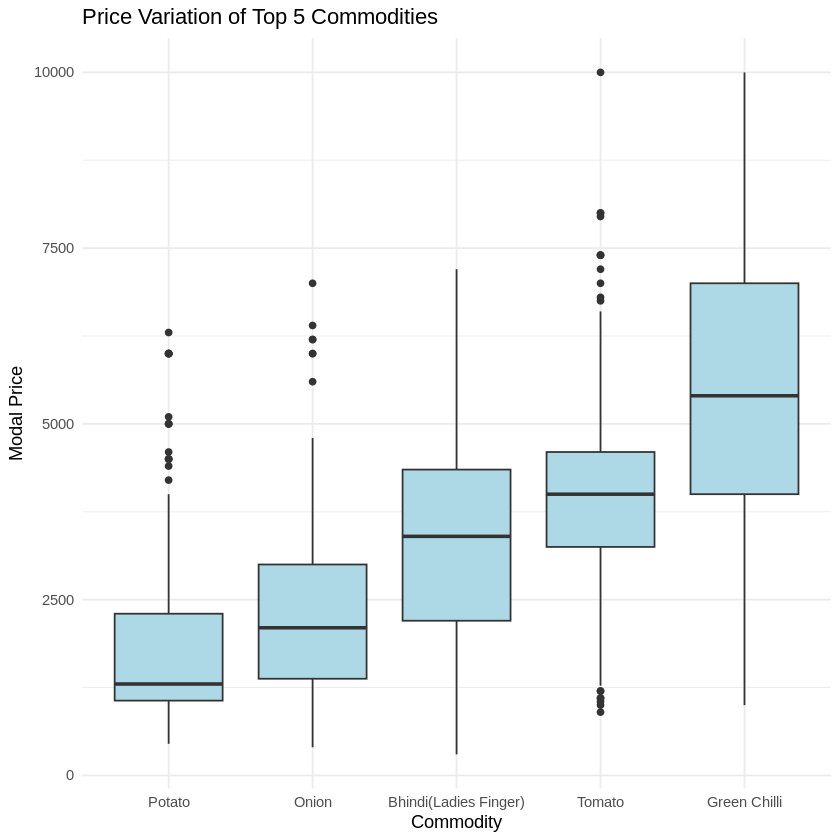

In [ ]:

cat("Generating Box Plot for Price Variation by Commodity...\n")
top_5_commodities <- df %>%
  count(Commodity, sort = TRUE) %>%
  head(5) %>%
  pull(Commodity)

df %>%
  filter(Commodity %in% top_5_commodities) %>%
  ggplot(aes(x = reorder(Commodity, Modal_Price, FUN = median), y = Modal_Price)) +
  geom_boxplot(fill = "lightblue") +
  labs(
    title = "Price Variation of Top 5 Commodities",
    x = "Commodity",
    y = "Modal Price"
  ) +
  theme_minimal()
ggsave("price_variation_boxplot.png")
cat("Box plot for price variation saved as 'price_variation_boxplot.png'\n")

*  represent the insights from grouped summaries.
* compares the median, interquartile range (IQR), and outliers for the top commodities.
*  For example, a commodity like Onion might have a tight box with few outliers, indicating stable and predictable prices, while a specialty item or a highly perishable vegetable might have a wider box and many outliers, suggesting high price volatility and greater risk for farmers and traders.

5: Price Spread (Scatter Plot)

Generating Scatter Plot for Price Spread...


Saving 6.67 x 6.67 in image


Scatter plot of price spread saved as 'price_spread_scatter_plot.png'


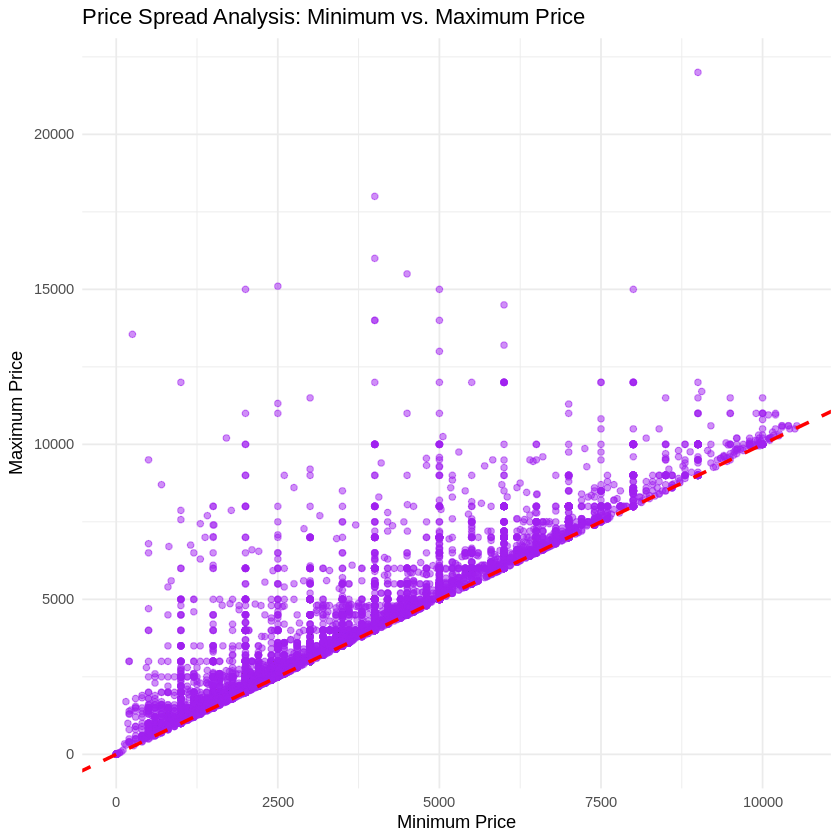

In [ ]:
# --- Visualization  ---
cat("Generating Scatter Plot for Price Spread...\n")
ggplot(df, aes(x = Min_Price, y = Max_Price)) +
  geom_point(alpha = 0.5, color = "purple") +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red", size = 1) +
  labs(
    title = "Price Spread Analysis: Minimum vs. Maximum Price",
    x = "Minimum Price",
    y = "Maximum Price"
  ) +
  theme_minimal()
ggsave("price_spread_scatter_plot.png")
cat("Scatter plot of price spread saved as 'price_spread_scatter_plot.png'\n")



*  crucial for understanding the relationship between Min_Price and Max_Price.
*  If the points cluster tightly along the red dashed line (the line of perfect equality), it suggests that the price spread (Max_Price - Min_Price) is consistently small.

*  The plot will likely show that as Min_Price increases, the price spread also tends to increase. This means that higher-priced commodities often exhibit wider price fluctuations, while lower-priced commodities have more stable price bands.
*  The points farthest from the dashed line represent the anomalies you identified during your data cleaning, where the difference between the minimum and maximum prices is unusually large.